In [1]:
import matplotlib.pyplot as plt
import numpy as np

from checking_tools import checkLabels, checkNormals, plot_sparsity
from Trefft_tools import TrefftzSpace, TrefftzFunction,  AssembleRHS, AssembleMatrix, AssembleGreenRHS#, AssembleGreenIncidentRHS
from geometry_tools import Edge
from meshes import testMesh, toyMesh, waveguideMesh, GradientMesh, squareMesh
from meshes import ScattererType
from testcases import TestCase
from matplotlib.patches import Rectangle, Circle

from domains import Waveguide, ScattererShape, ScattererType

In [110]:
R = 10.
H = 2.

Domain = Waveguide()
# for y in np.linspace(0.3,1.7,3):
#     Domain.add_scatterer( ScattererShape.CIRCLE, ScattererType.SOUND_SOFT, ((0,y), 0.2))

for y in np.linspace(0.3,1.7,2):
    Domain.add_scatterer( ScattererShape.RECTANGLE, ScattererType.SOUND_SOFT, ((0,y), 0.2, 0.4))



Omega, Edges = Domain.generate_mesh(h_max=H/3)


In [111]:
Omega.edges[0].faces[0].nr

0

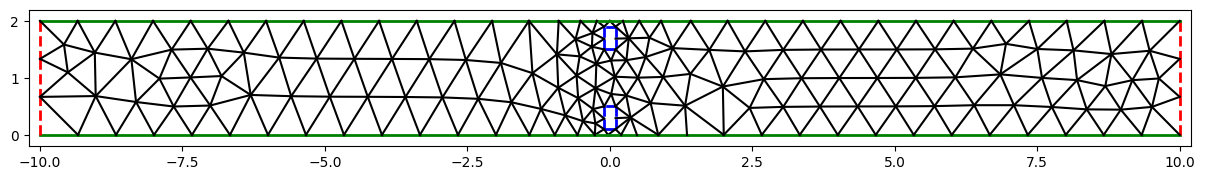

In [112]:
checkLabels(Edges)

In [113]:




# def scatterer_mask(Omega):
#     pass

In [114]:
5*np.pi/2

7.853981633974483

In [115]:
# test_case = TestCase.SOUND_SOFT_SCATTERER

In [116]:
# R = 10.
# H = 2.


# match test_case:
#     case TestCase.FINE_MESH_BARRIER:
#         scatterer_type = ScattererType.NONE
#         Omega = GradientMesh(h_max=H/3, h_min=0.1)
#         scatterer_type = ScattererType.NONE

#     case TestCase.PROPAGATING_MODE:
#         Omega = testMesh(H = H, h_max=H/3)
#         scatterer_type = ScattererType.NONE
#     case TestCase.FUNDAMENTAL_CIRCLE:
#         rad = 0.3
#         c = (0.,H/2)
#         c = (0., 3/4*H)
#         scatterer_type = ScattererType.GREEN_FUNC
#         kwargs = {"facecolor" : "grey", "edgecolor" : "black", "linewidth" : 3}
#         scatterer = lambda :  Circle( xy=c, radius=rad, **kwargs)
#         Omega = waveguideMesh(R = R, H = H, h_max=H/3,rad = rad, c=c,  scatterer_type=scatterer_type)

#     case TestCase.FUNDAMENTAL_SQUARE: # | TestCase.FUNDAMENTAL_SQUARE_PlUS_INCIDENT:
#         L = H/2
#         c = (0.,H/2)
#         scatterer_type = ScattererType.GREEN_FUNC
#         kwargs = {"facecolor" : "grey", "edgecolor" : "black", "linewidth" : 3}
#         scatterer = lambda :  Rectangle( xy=(c[0]-L/2, c[1]-L/2), height=L, width=L,  **kwargs)
#         Omega = squareMesh(R = R, H=H, h_max=H/3, L = L, c=c,  scatterer_type=scatterer_type)

#     case TestCase.PENETRABLE_SCATTERER:
#         rad = 0.8
#         c = (0.,H/2)
#         #c =( 0., 3/4*H)
#         scatterer_type = ScattererType.PENETRABLE
#         Omega = waveguideMesh(R = R, H=H, h_max=H/3,rad = rad, c=c,  scatterer_type=scatterer_type)
#         kwargs = {"facecolor" : "none", "edgecolor" : "black", "linewidth" : 3}
#         scatterer = lambda : Circle( xy=c, radius=rad, **kwargs)

#     case TestCase.SOUND_SOFT_SCATTERER:
#         rad = 0.3
#         c = (0.,H/2)
#         #c = (0., 3/4*H)
#         scatterer_type = ScattererType.SOUND_SOFT
#         Omega = waveguideMesh(R = R, H=H,  h_max=H/3,rad = rad, c=c,  scatterer_type=scatterer_type)
#         kwargs = {"facecolor" : "grey", "edgecolor" : "black", "linewidth" : 3}
#         scatterer = lambda : Circle( xy=c, radius=rad, **kwargs)



In [117]:
# match scatterer_type:
#     case ScattererType.NONE:
#         Edges = [ Edge(Omega, e, None)  for e in Omega.edges ]
#     case _:
#         Edges = [ Edge(Omega, e, c)  for e in Omega.edges ]



In [118]:
side_ls = np.array([E.l for E in Edges])
h_max = np.max(side_ls)
h_max

0.9776334194166031

Checking the orientation of the labels...

In [119]:
# checkLabels(Edges, H=H)
# if scatterer_type != ScattererType.NONE:
#     plt.gca().add_patch(scatterer())

and the orientation of the normals...

(1.65, 1.9500000000000002)

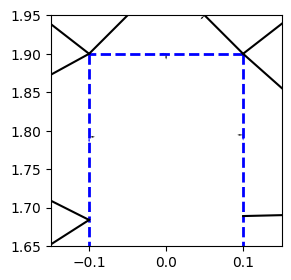

In [120]:
checkNormals(Edges)
rad = 0.1
c = [0.2,1.8]
plt.xlim([-1.5*rad,1.5*rad])
plt.ylim([c[1] - 1.5*rad, c[1]+1.5*rad])

and the definition of the "plus" and "minus" quantities...

In [121]:
  # checkPlusMinus(Edges, Baricenters) 

In [156]:
kappa_e = 8.
kappa_e = 7.85

kappa_i = 12.


In [157]:
# #optimal angle for mode "t" : th = arcsin( lambda /  (2H)) 
# t = 2
# dth = np.arcsin( t*np.pi / (kappa_e*H))
# # optimal number of waves for mode "t":
# Nth = int(2*np.pi / dth)
# Nth 

In [158]:
Nth = 15
th_0 = np.e/np.pi # no correct direction in the basis
#th = 0. # right direction in the basis
V = TrefftzSpace(Omega, Nth, {"Omega_i" : kappa_i , "Omega_e" : kappa_e}, th_0 )


In [159]:
test_case = TestCase.SOUND_SOFT_SCATTERER

In [160]:
NP = 20
a = 0.5*h_max/side_ls
b = 0.5*h_max/side_ls

# a = 0.5
# b = 0.5

d_1 = 0.5
d_2 = 0.5
A = AssembleMatrix(V, Edges, Np=NP, a=a, b=b, d_1=d_1, d_2=d_2)
NDOF = A.shape[0]


In [161]:
print(f'{NDOF=}. Matrix with {np.count_nonzero(A.toarray())} non-zero entries from a total of {NDOF**2}. "fullness" ratio: {np.count_nonzero(A.toarray())/NDOF**2 * 100 : .2f}%')

NDOF=4260. Matrix with 238950 non-zero entries from a total of 18147600. "fullness" ratio:  1.32%


In [162]:
# Ncond = np.linalg.cond(A.toarray())
Ncond = -1
Ncond 

-1

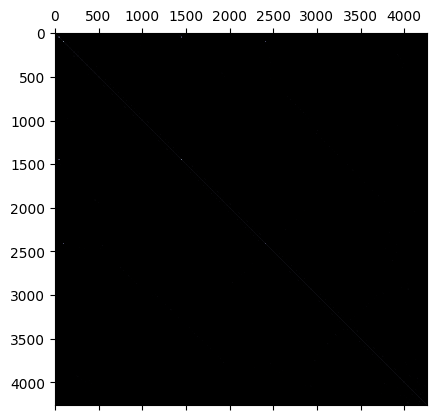

In [163]:
plot_sparsity(A)

In [164]:

match test_case:
    case TestCase.FUNDAMENTAL_CIRCLE | TestCase.FUNDAMENTAL_SQUARE:
        modes = True
        B = AssembleGreenRHS(V, Edges, kappa_e, H, a=a, y0=c[1], modes=modes)
    # case TestCase.FUNDAMENTAL_SQUARE_PlUS_INCIDENT:
    #     modes = True 
    #     t = 0
    #     B = AssembleGreenIncidentRHS(V, Edges, kappa_e, H, a, d_2, y0=c[1], t=t, modes=True)
    case _:
        t = 0
        B = AssembleRHS(V, Edges, kappa_e, H, d_2=d_2, t=t)


In [165]:
from scipy.sparse.linalg import bicgstab 
from scipy.sparse.linalg import spsolve 
A = A.tocsc()
#DOFs, _ = bicgstab(A,B)
DOFs = spsolve(A,B)
f = TrefftzFunction(V,DOFs)

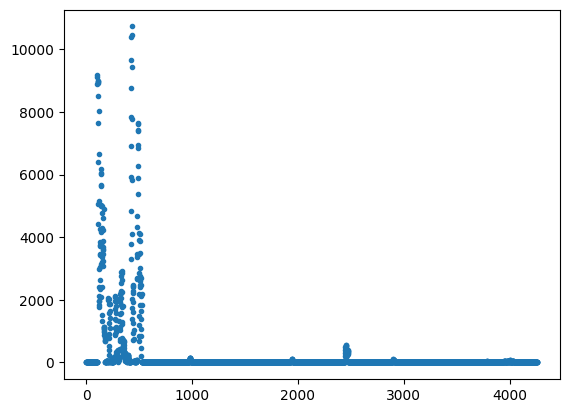

In [166]:
plt.plot(np.abs(DOFs),'.')

In [167]:
Ny = 50
Nx = 10*Ny
x = np.linspace(-R,R,Nx)
y = np.linspace(0,H,Ny)
X, Y = np.meshgrid(x,y)

# Z = np.reshape(f(X.ravel(), Y.ravel()), [Ny,Nx]) FIX THIS, EVALUATION SHOULD BE VECTORIZED

u_Trefft =  np.reshape([ f(x_, y_) for x_, y_ in zip( X.ravel(), Y.ravel()) ], [Ny,Nx])


In [168]:
np.abs(u_Trefft)

array([[1.58051107, 1.93495582, 2.1081235 , ..., 0.33031228, 0.31126452,
        0.29143645],
       [1.57487511, 1.93032385, 2.10488336, ..., 0.32136928, 0.3030148 ,
        0.2837794 ],
       [1.55848643, 1.91686145, 2.09540464, ..., 0.29556861, 0.27919087,
        0.26200474],
       ...,
       [1.55940776, 1.9180697 , 2.09682824, ..., 0.29529819, 0.27893386,
        0.26176247],
       [1.57595929, 1.93159835, 2.10638214, ..., 0.32111042, 0.30274585,
        0.28351593],
       [1.58169341, 1.93624903, 2.10963104, ..., 0.33000341, 0.3109725 ,
        0.29111576]])

NameError: name 'scatterer_type' is not defined

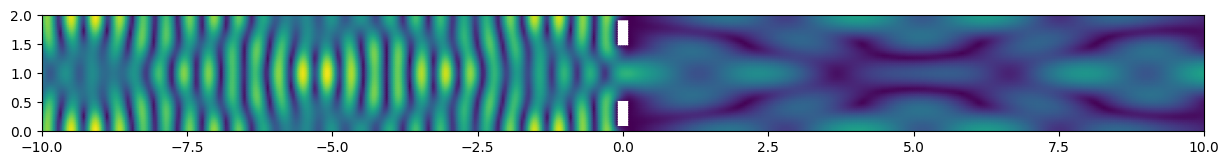

In [176]:
_, ax = plt.subplots( figsize=(15,3))

# import matplotlib.colors as colors
# ax.imshow(np.abs(u_Trefft), origin="lower", extent=[-R,R,0,H], norm=colors.LogNorm(vmin=0.05,vmax=0.8))

# ax.imshow(np.abs(u_Trefft), origin="lower", extent=[-R,R,0,H],vmax=0.8)
ax.pcolormesh(X, Y, np.abs(u_Trefft), shading="gouraud")


#checkLabels(Edges, ax)
ax.axis('square')
ax.set_xlim([-R,R])
ax.set_ylim([0,H])

match scatterer_type:
    case ScattererType.PENETRABLE:
        ax.set_title(f'Penetrable: mode number: {t}, {Nth} plane waves per triangle, condition number = $\\mathtt{{ {Ncond: .3f} }}$, $\\kappa={kappa_e:.1f}$')
    case ScattererType.SOUND_SOFT:
         ax.set_title(f'Sound-soft: mode number: {t}, {Nth} plane waves per triangle, condition number = $\\mathtt{{ {Ncond: .3f} }}$, $\\kappa={kappa_e:.1f}$')
    case ScattererType.GREEN_FUNC:
        ax.set_title(f'Green function case, {Nth} plane waves per triangle, condition number =   $\\mathtt{{ {Ncond: .3f} }}$, $\\kappa={kappa_e:.1f}$')


if scatterer_type != ScattererType.NONE:
    ax.add_patch(scatterer())

save = False
if save:
    plt.savefig(f'test_{t}_{Nth}_d2.png')


In [ ]:
from FEM_solution import u_FEM_SOUNDSOFT, u_FEM_PENETRABLE
from exact_solutions import GreenFunctionImages, GreenFunctionModes

match test_case:
    case TestCase.SOUND_SOFT_SCATTERER:
        u_test = u_FEM_SOUNDSOFT(R=R, H=H, rad=rad, c = c, n=t,k=kappa_e, X=X, Y=Y)
    case TestCase.PENETRABLE_SCATTERER:
        u_test = u_FEM_PENETRABLE(R=R, H=H, rad=rad, c = c, n=t,k_e=kappa_e, k_i=kappa_i, X=X, Y=Y)
    case TestCase.FUNDAMENTAL_CIRCLE | TestCase.FUNDAMENTAL_SQUARE:
        if modes:
            u_test = np.reshape( GreenFunctionModes(kappa_e,H, np.stack([X.ravel(),Y.ravel()], axis=1), 0., c[1], M=200), (Ny,Nx))
        else:
            u_test = np.reshape( GreenFunctionImages(kappa_e,H, np.stack([X.ravel(),Y.ravel()], axis=1), 0., c[1], M=400), (Ny,Nx))
        if test_case == TestCase.FUNDAMENTAL_SQUARE:
            u_test = np.where( np.logical_and( np.abs(X-c[0])<= L/2,  np.abs(Y-c[1]) <= L/2) , np.full_like(u_test,np.nan), u_test)        
        else: 
            u_test = np.where( (X-c[0])**2 + (Y-c[1])**2 <= rad**2, np.full_like(u_test,np.nan), u_test)
    # case TestCase.FUNDAMENTAL_SQUARE_PlUS_INCIDENT:
    #     if modes:
    #         u_test = np.reshape( GreenFunctionModes(kappa_e,H, np.stack([X.ravel(),Y.ravel()], axis=1), 0., c[1], M=200), (Ny,Nx))
    #     else:
    #         u_test = np.reshape( GreenFunctionImages(kappa_e,H, np.stack([X.ravel(),Y.ravel()], axis=1), 0., c[1], M=400), (Ny,Nx))
    #     u_test = u_test + np.exp(1j*np.sqrt(kappa_e**2 - (t*np.pi/H)**2)*X)*np.cos(t*np.pi*Y/H)

    #     u_test = np.where( np.logical_and( np.abs(X-c[0])<= L/2,  np.abs(Y-c[1]) <= L/2) , np.full_like(u_test,np.nan), u_test)        

    case TestCase.PROPAGATING_MODE | TestCase.FINE_MESH_BARRIER:
        u_test = np.exp(1j*np.emath.sqrt(kappa_e**2 - (t*np.pi/H)**2)*X)*np.cos(t*np.pi*Y/H)



NDOF: 324170


NameError: name 'scatterer_type' is not defined

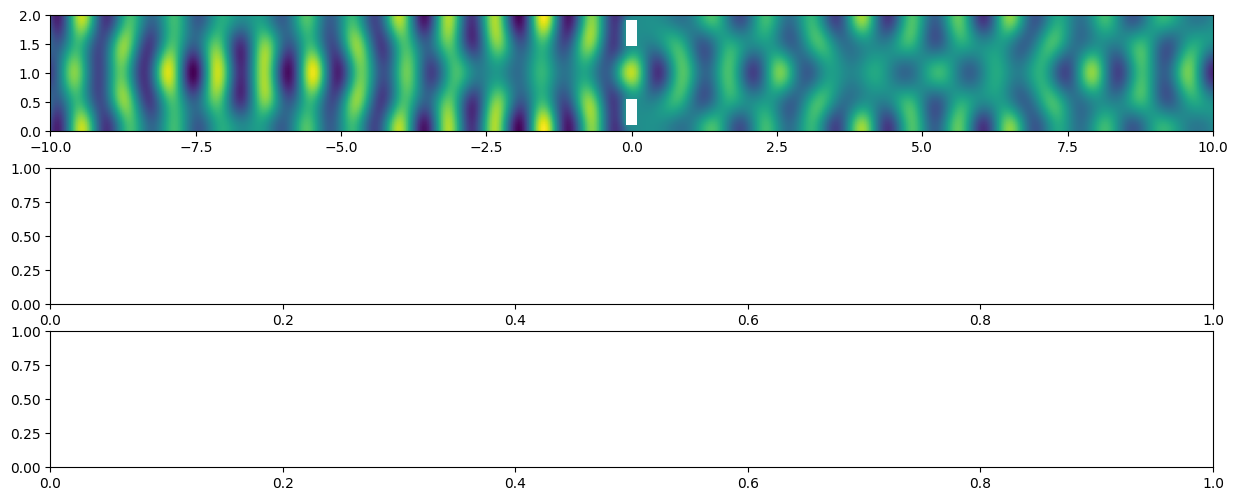

In [ ]:
fig, ax = plt.subplots( nrows = 3, figsize=(15,6))


ax[0].imshow(np.real(u_Trefft), origin="lower", extent=[-R,R,0,H])
if scatterer_type != ScattererType.NONE:
    ax[0].add_patch(scatterer())
checkLabels(Edges, ax[0])
ax[0].axis('square')
ax[0].set_xlim([-R,R])
ax[0].set_ylim([0,H])

match test_case: 
    case TestCase.PENETRABLE_SCATTERER | TestCase.PROPAGATING_MODE | TestCase.FINE_MESH_BARRIER:
        diff = np.abs(u_Trefft - u_test)
    # case TestCase.FUNDAMENTAL_SQUARE | TestCase.FUNDAMENTAL_SQUARE_PlUS_INCIDENT:
    #     diff = np.where( np.logical_and( np.abs(X-c[0])<= L/2,  np.abs(Y-c[1]) <= L/2), 0.,  np.abs(u_Trefft - u_test))
    case _:
        diff = np.where( (X-c[0])**2 + (Y-c[1])**2> rad**2, np.abs(u_Trefft - u_test), 0.)

L2_err = np.sqrt(np.sum(diff**2)*(2*R*2*H)) 
L_inf_err = np.max(diff)


ax[1].imshow(np.real(u_test), origin="lower", extent=[-R,R,0,H])
if scatterer_type != ScattererType.NONE:
    ax[1].add_patch(scatterer())
#checkLabels(Edges, ax[1])
ax[1].axis('square')
ax[1].set_xlim([-R,R])
ax[1].set_ylim([0,H])



ax[2].imshow(np.abs(u_Trefft-u_test), origin="lower", extent=[-R,R,0,H])


checkLabels(Edges, ax[2])
if scatterer_type != ScattererType.NONE:
    ax[2].add_patch(scatterer())

ax[2].axis('square')
ax[2].set_xlim([-R,R])
ax[2].set_ylim([0,H])

match scatterer_type:
    case ScattererType.SOUND_HARD | ScattererType.SOUND_SOFT:
        fig.suptitle(f'{scatterer_type.name} mode: {t}, {Nth} waves per triangle, condition number = {Ncond: .3E}, $\\kappa={kappa_e:.1f}$, errors: $L_2={L2_err:.1e}$, $L_\\infty={L_inf_err:.1e}$')
        ax[0].set_title('$\\mathfrak{Re}\\left(u_\\mathrm{tot}\\right)$ (Trefftz)')
        ax[1].set_title('$\\mathfrak{Re}\\left(u_\\mathrm{tot}\\right)$ (FEM)')
        ax[2].set_title('$\\left\\vert u^\\mathrm{FEM}_\\mathrm{tot}-u^\\mathrm{Treftzz}_\\mathrm{tot}\\right\\vert$')

    case  ScattererType.PENETRABLE:
        fig.suptitle(f'{scatterer_type.name} mode: {t}, {Nth} waves per triangle, condition number = {Ncond: .3E}, $\\kappa_e={kappa_e:.1f}$, $\\kappa_i={kappa_i:.1f}$, errors: $L_2={L2_err:.1e}$, $L_\\infty={L_inf_err:.1e}$')
        ax[0].set_title('$\\mathfrak{Re}\\left(u_\\mathrm{tot}\\right)$ (Trefftz)')
        ax[1].set_title('$\\mathfrak{Re}\\left(u_\\mathrm{tot}\\right)$ (FEM)')
        ax[2].set_title('$\\left\\vert u^\\mathrm{FEM}_\\mathrm{tot}-u^\\mathrm{Treftzz}_\\mathrm{tot}\\right\\vert$')


    case ScattererType.GREEN_FUNC:
        fig.suptitle(f'{scatterer_type.name}, {Nth} waves per triangle, condition number = {Ncond: .3E}, $\\kappa={kappa_e:.1f}$, errors: $L_2={L2_err:.1e}$, $L_\\infty={L_inf_err:.1e}$')
        ax[0].set_title('$\\mathfrak{Re}\\left(u_\\mathrm{sc}\\right)$ (Trefftz)')
        ax[1].set_title('$\\mathfrak{Re}\\left(u_\\mathrm{sc}\\right)$ (Green function)')
        ax[2].set_title('$\\left\\vert G -u^\\mathrm{Treftzz}_\\mathrm{tot}\\right\\vert$')
    
    case ScattererType.NONE:
        fig.suptitle(f'{scatterer_type.name}, {Nth} waves per triangle, condition number = {Ncond: .3E}, $\\kappa={kappa_e:.1f}$, errors: $L_2={L2_err:.1e}$, $L_\\infty={L_inf_err:.1e}$')
        ax[0].set_title('$\\mathfrak{Re}\\left(u_\\mathrm{tot}\\right)$ (Trefftz)')
        ax[1].set_title('$\\mathfrak{Re}\\left(u_\\mathrm{tot}\\right)$ (Green function)')
        ax[2].set_title('$\\left\\vert G -u^\\mathrm{Treftzz}_\\mathrm{tot}\\right\\vert$')
    

save = False
if save:
    plt.savefig(f'mode_{t}_{Nth}_no_d2_no_wave_in_basis.png')

10.0


Text(0.5, 1.0, '$\\left|u_\\mathrm{sc}^\\mathrm{Trefftz}(R,y)-u_\\mathrm{sc}^\\mathrm{modes}(R,y)\\right|$')

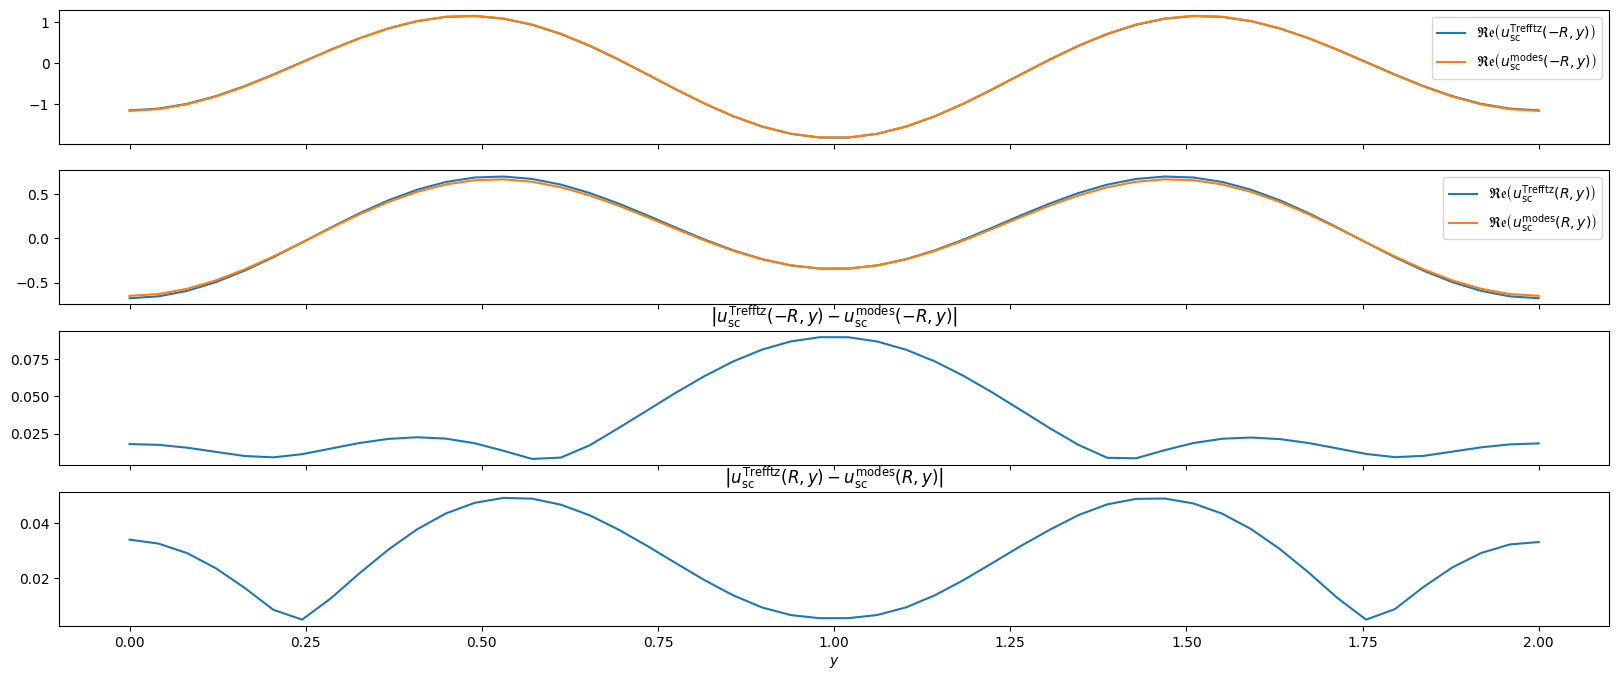

In [ ]:
fig, ax = plt.subplots(nrows=4, figsize=(20,8), sharex=True)

ax[0].plot(y,np.real(u_Trefft[:,0]), label='$\\mathfrak{Re}\\left(u_\\mathrm{sc}^\\mathrm{Trefftz}(-R,y)\\right)$')
ax[0].plot(y,np.real(u_test[:,0]), label='$\\mathfrak{Re}\\left(u_\\mathrm{sc}^\\mathrm{modes}(-R,y)\\right)$')
ax[0].legend()

j_err = -1
print(x[j_err])
ax[1].plot(y,np.real(u_Trefft[:,j_err]), label='$\\mathfrak{Re}\\left(u_\\mathrm{sc}^\\mathrm{Trefftz}(R,y)\\right)$')
ax[1].plot(y,np.real(u_test[:,j_err]), label='$\\mathfrak{Re}\\left(u_\\mathrm{sc}^\\mathrm{modes}(R,y)\\right)$')
ax[1].legend()

ax[2].plot(y,np.abs(u_Trefft[:,0] - u_test[:,0]), label='$\\mathfrak{Re}\\left(u_\\mathrm{sc}\\right)$')
ax[2].set_title('$\\left|u_\\mathrm{sc}^\\mathrm{Trefftz}(-R,y)-u_\\mathrm{sc}^\\mathrm{modes}(-R,y)\\right|$')

ax[3].plot(y,np.abs(u_Trefft[:,-1] - u_test[:,-1]), label='$\\mathfrak{Re}\\left(u_\\mathrm{sc}\\right)$')
ax[3].set_xlabel('$y$')
ax[3].set_title('$\\left|u_\\mathrm{sc}^\\mathrm{Trefftz}(R,y)-u_\\mathrm{sc}^\\mathrm{modes}(R,y)\\right|$')

# plt.legend()


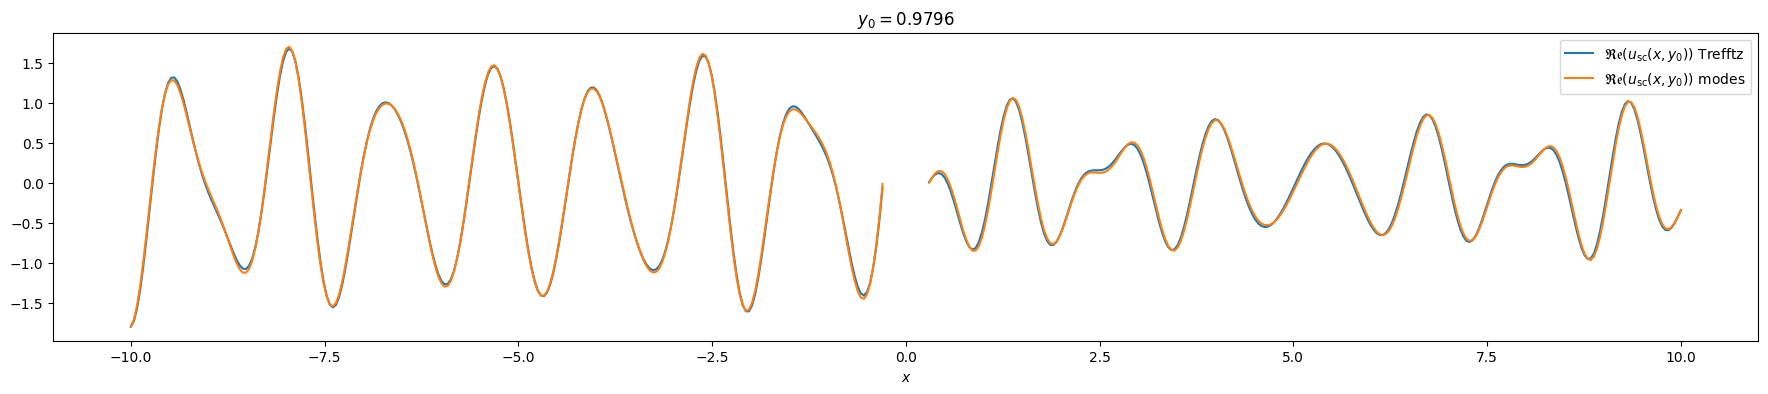

In [ ]:
j=24
vmin = -3
vmax = 3
fig, ax = plt.subplots(figsize=(22,4))
ax.plot(x,np.real(u_Trefft[j,:]), label='$\\mathfrak{Re}\\left(u_\\mathrm{sc}(x,y_0)\\right)$ Trefftz')
ax.plot(x,np.real(u_test[j,:]), label='$\\mathfrak{Re}\\left(u_\\mathrm{sc}(x,y_0)\\right)$ modes')
ax.set_xlabel('$x$')
ax.set_title(f'$y_0={y[j]:.4f}$')
plt.legend(loc="upper right")


In [146]:
# T = 5
# fps = 20
# Nt = int(fps*T)
# t_ = np.linspace(0,T,Nt)
# w = 2*np.pi*1/1

# vmin = -3
# vmax = 3
# for n in range(Nt):
#     fig, ax = plt.subplots( figsize=(15,3))

#     ax.imshow(np.real(Z*np.exp(-1j*w*t_[n])), origin="lower", vmin=vmin, vmax=vmax, extent=[-R,R,-H,H], interpolation='bilinear', cmap='Blues')
#     ax.axis('square')
#     ax.set_xlim([-R,R])
#     ax.set_ylim([-H,H])
#     ax.set_title(f'mode number: {t}, {Nth} plane waves per triangle, $\\kappa={kappa_e:.1f}$, $t = \\mathtt{{{t_[n]:.2f}}}$')
#     ax.add_patch(Circle(xy=c,radius=rad, **kwargs))

#     plt.savefig(f'./r02_t1/{n:02d}.png',dpi=200)
#     plt.close()

In [147]:
from numpy import dot, exp, sinc, pi

def Generate_proyection_system(k, r_A, r_B, r_C, d):
    Np = len(d)
    P = np.zeros((Np,Np), dtype=np.complex128 )
    f = np.zeros( Np, dtype=np.complex128)
    J = (r_B[0]-r_A[0])*(r_C[1] - r_A[1]) - (r_C[0] - r_A[0])*(r_B[1]-r_A[1])
    i = np.array([1,0])
    for m in range(Np):
        f[m] = J /(1j*k*dot( i - d[m], r_C - r_A )) * ( exp(1j*k*dot(  i - d[m], (r_B+r_C)/2))* sinc(k/(2*pi)*dot(  i - d[m], r_C - r_B )) 
                                                       -exp(1j*k*dot(  i - d[m], (r_A+r_B)/2))* sinc(k/(2*pi)*dot(  i - d[m], r_B - r_A )))
        for n in range(Np):
            P[m,n] = J /(1j*k*dot( d[n] - d[m], r_C - r_A )) * ( exp(1j*k*dot(  d[n] - d[m], (r_B+r_C)/2))* sinc(k/(2*pi)*dot(  d[n] - d[m], r_C - r_B )) 
                                                                -exp(1j*k*dot(  d[n] - d[m], (r_A+r_B)/2))* sinc(k/(2*pi)*dot(  d[n] - d[m], r_B - r_A )))
    return P, f

In [148]:
theta = th_0 + np.linspace(0,2*np.pi,Nth, endpoint=False)
d = [ np.array([np.cos(th), np.sin(th)]) for th in theta]


In [149]:
nf = 0

r_A = np.array(Omega.vertices[ Omega.faces[nf].vertices[0].nr ].point) 
r_B = np.array(Omega.vertices[ Omega.faces[nf].vertices[1].nr ].point)
r_C = np.array(Omega.vertices[ Omega.faces[nf].vertices[2].nr ].point)


P, f = Generate_proyection_system(kappa_e, r_A, r_B, r_C, d)

/tmp/ipykernel_96496/322436872.py:13: RuntimeWarning: divide by zero encountered in divide
  P[m,n] = J /(1j*k*dot( d[n] - d[m], r_C - r_A )) * ( exp(1j*k*dot(  d[n] - d[m], (r_B+r_C)/2))* sinc(k/(2*pi)*dot(  d[n] - d[m], r_C - r_B ))
/tmp/ipykernel_96496/322436872.py:13: RuntimeWarning: invalid value encountered in divide
  P[m,n] = J /(1j*k*dot( d[n] - d[m], r_C - r_A )) * ( exp(1j*k*dot(  d[n] - d[m], (r_B+r_C)/2))* sinc(k/(2*pi)*dot(  d[n] - d[m], r_C - r_B ))
/tmp/ipykernel_96496/322436872.py:13: RuntimeWarning: invalid value encountered in scalar multiply
  P[m,n] = J /(1j*k*dot( d[n] - d[m], r_C - r_A )) * ( exp(1j*k*dot(  d[n] - d[m], (r_B+r_C)/2))* sinc(k/(2*pi)*dot(  d[n] - d[m], r_C - r_B ))


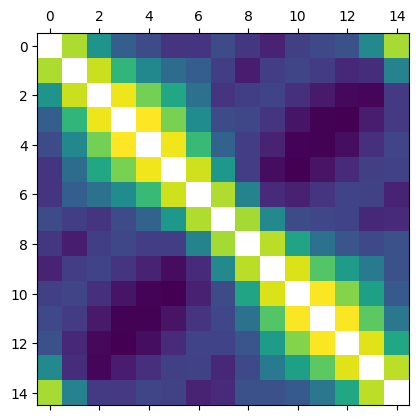

In [64]:
plt.matshow(np.abs(P))